## **K-Nearest Neighbors (KNN) Regresor**

**Introducción**

K-Nearest Neighbors (KNN) es un método sencillo y efectivo tanto para clasificación como para regresión. En el contexto de regresión, KNN predice el valor de una nueva muestra basándose en los valores de las muestras más cercanas en el conjunto de entrenamiento. Este método es conocido por su simplicidad y efectividad en problemas donde la relación entre las características y la variable objetivo es compleja y no lineal.
 
**Teoría de KNN Regresor**
 
**Concepto Básico**
 
La idea principal detrás del KNN regresor es que las observaciones similares tienen valores similares. Para predecir el valor de una nueva muestra, KNN sigue los siguientes pasos:
 
**Cálculo de Distancias:** Se calcula la distancia entre la nueva muestra y todas las muestras en el conjunto de entrenamiento. Comúnmente, se usa la distancia euclidiana, pero también se pueden usar otras medidas como la distancia de Manhattan, la distancia de Minkowski, etc.
 
**Selección de Vecinos:** Se seleccionan las K muestras más cercanas (vecinos) basándose en las distancias calculadas.
 
**Cálculo del Valor Predicho:** Se calcula la media (o en algunos casos la mediana) de los valores de las K muestras seleccionadas. Este valor se utiliza como la predicción para la nueva muestra.
 
**Ventajas y Desventajas**
 
**Ventajas**
 
**Simplicidad:** KNN es fácil de entender e implementar. No requiere suposiciones sobre la distribución de los datos.
 
**Adaptabilidad:** Puede capturar relaciones complejas y no lineales entre las características y la variable objetivo.
 
**No Paramétrico:** No necesita estimar parámetros específicos, lo que lo hace flexible en diversas situaciones.
 
**Desventajas**
 
**Costoso en Computación:** El cálculo de distancias para todas las muestras puede ser costoso, especialmente para conjuntos de datos grandes.
 
**Sensibilidad a la Escala:** Las características con diferentes escalas pueden influir de manera desigual en las predicciones, por lo que es necesario escalar los datos.

**Almacenamiento de Datos:** Requiere almacenar todo el conjunto de entrenamiento, lo que puede ser un problema en términos de memoria.
  
**Selección del Valor de K**
 
El valor de K es crucial para el rendimiento del modelo KNN. Un K pequeño puede hacer que el modelo sea sensible al ruido, mientras que un K grande puede hacer que el modelo sea demasiado general y no capture bien las relaciones locales. La selección del valor de K se realiza típicamente mediante validación cruzada.
 
**Escalado de Datos**
 
El KNN es sensible a las escalas de las características. Por lo tanto, es esencial escalar las características para que todas contribuyan de manera equitativa a las predicciones. Comúnmente se utiliza la normalización (escalar los valores para que estén en el rango [0, 1]) o la estandarización (restar la media y dividir por la desviación estándar).
 
**Medidas de Distancia**
 
Las medidas de distancia más comunes usadas en KNN son:
 
Distancia Euclidiana

Distancia Manhattan

Distancia Minkowski
 
Cada medida de distancia tiene sus propias características y puede ser adecuada para diferentes tipos de datos.
 
**Implementación en Python**
 
**Ejemplo de Uso**
 
Supongamos que tenemos un conjunto de datos housing_prices.csv con las siguientes columnas:
 
**size:** Tamaño de la casa en pies cuadrados.

**bedrooms:** Número de habitaciones.
 
**price:** Precio de venta de la casa.
 
**Carga de Datos y Exploración**





In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('../../data/ml/house-prices.csv')

# Exploración de datos
print(data.head())
print(data.describe())

# Separar variables predictoras y objetivo
X = data[['SqFt', 'Bedrooms']]
y = data['Price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000

**Ajuste de Hiperparámetros**

Para seleccionar el mejor valor de K, podemos usar la validación cruzada.

In [2]:
from sklearn.model_selection import cross_val_score

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 18


**Visualización de Resultados**

Podemos visualizar cómo cambia el MSE con diferentes valores de K.

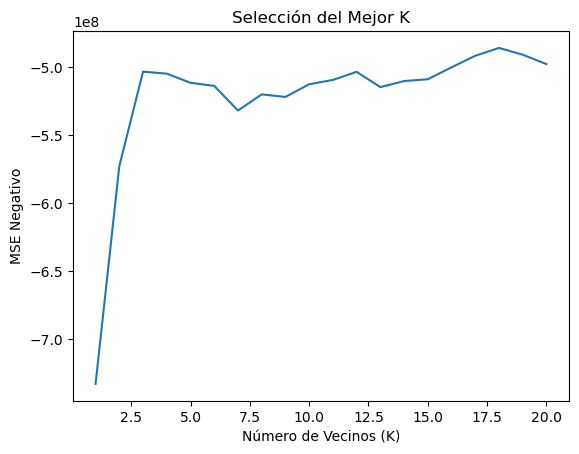

In [3]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

**Aplicaciones Prácticas**
 
**Predicción de Precios de Casas**
 
En la industria inmobiliaria, KNN puede ser utilizado para predecir el precio de una casa basada en características similares de otras casas vendidas. Esto es útil para agentes inmobiliarios y compradores de viviendas que desean obtener una estimación rápida del valor de una propiedad.
 
**Análisis de Mercado**
 
KNN puede ayudar a las empresas a segmentar mercados y entender mejor las preferencias de los consumidores. Por ejemplo, un minorista puede usar KNN para predecir el gasto de los clientes basado en sus características demográficas y comportamientos de compra pasados.
 
**Predicción de la Demanda**
 
En la cadena de suministro, KNN puede ser utilizado para predecir la demanda de productos en función de datos históricos de ventas y factores externos como la estacionalidad y las promociones.